# Capstone Project: Consumer Insights Data Analytics Externship of Beats by Dre

Kindly use this template to get an overview of the structure that you need to follow in your capstone project.

Ensure that the final insights that you produce in your analysis stand out and are easily accessible.

You need to provide the code snippets that you used to run the code.

## 1. Title Page
**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Student Name:** Krishita Laungani
**Date:** September 1st 2024

## 2. Table of Contents
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion
9. References

## 3. Introduction




### 3.1 Project Overview


This project aims to help Beats understand customer sentiments toward their speaker products **(Specifically the Beats Pill)** by analyzing reviews from various sources, including direct competitors. By comparing Beats speakers with those of competing brands, the project uncovers strengths, weaknesses, and unique selling points from a customer perspective. These insights will guide Beats in refining their product strategies, enhancing their market position, and improving customer satisfaction.

Some Key Objectives Include:

  1. Identifying  Statistical Insights

  2. Identifying Product Strengths and Weaknesses

  3. Competitor Analysis

### 3.2 Background


Beats by Dre was co-founded in 2006 by legendary music producer and rapper Dr. Dre and record executive Jimmy Iovine. The brand was created with a simple yet powerful vision: to bring studio-quality sound to everyday listeners. At a time when audio quality was often compromised by subpar headphones, Beats set out to revolutionize the listening experience by delivering the full range of music as the artist intended.

 In a short time, Beats transformed audio devices from mere accessories into cultural icons, bringing the energy, emotion, and excitement of studio playback into everyday listening experiences. The brand continues to thrive by connecting consumers with the music, people, and culture that inspire them, making Beats synonymous with high-quality sound and style.



In the tech industry, understanding consumer sentiment is crucial. For a brand like Beats, knowing what customers love—and what they don’t—is key to staying relevant and innovative. Analyzing customer feedback provides a window into how products are perceived, revealing what’s working and what needs improvement. This insight allows Beats to continually enhance their products, ensuring they resonate with listeners and maintain their status as a leader in audio technology.

## 4. Data Description



### 4.1 Data Sources


The dataset used in this project comprises customer reviews collected from Amazon, a leading global e-commerce platform. Amazon reviews are an invaluable resource for understanding consumer sentiments, as they offer firsthand feedback on a wide range of products, including electronics like the Beats Pill and its competitors.

The products and links from which the reviews were scraped can be found here: [Google Docs](https://docs.google.com/document/d/1j7vhRjLqpjUoIRhXLwBRyqPE0_kBSxa7BO4N9nlBIEQ/edit?usp=sharing)

### 4.2 Data Collection


Using Oxylabs, a web scraping tool, reviews were extracted to capture real user experiences, opinions, and sentiments directly from one of the most influential e-commerce platforms. However, there is a limit to how many reviews OxyLabs can scrape at once, so only the first 100-150 reviews were captured from each source page.

The final dataset can be found here: [CSV](https://drive.google.com/file/d/1K33o2n4V5RsQmxmpY8_iI_w_OuhCpv4E/view?usp=sharing)

### 4.3 Data Cleaning


Data Extraction:

Procedure: Essential details such as review ID, product ID, title, author, rating, content, timestamp, profile ID, verification status, helpful count, and product attributes were extracted.

Challenges: Irregular formatting in the product_id column made data processing difficult.

Solution: Custom parsing functions were developed to standardize and clean the product_id column, ensuring consistent formatting. Relevant null columns were filled in with "Not Listed"

Data Cleaning and Validation:

Procedure: Data cleaning involved removing duplicates, addressing missing values, and standardizing data types. Product attributes were extracted and organized.

Challenges: Null Values -- Some entries had missing content and attributes

Formatting Issues -- The product_id column had irregularities.

Solution: Null values were replaced with 'not listed,' and custom functions were used to clean and standardize the data, including addressing formatting issues.

In [11]:
import json
import pandas as pd

#reading uncleaned data
data_df = pd.read_csv('merged_data_1.csv')
len(data_df)

#displaying top of dataset
data_df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R3ED0R4VCG7DP7,B0CXL4FQBK,5.0 out of 5 stars Amazing Speaker for All Needs,Colin,5,I was in need of a new versatile portable spea...,"Reviewed in the United States June 24, 2024",AHWLZPJ4HLRGSDCGXHCEWVVOGX4Q,TRUE,17,Color: Off White
1,R7FS5ZX9N85YV,B0CXL4FQBK,5.0 out of 5 stars Concert Ready! Nice For the...,Melly Mel3,5,Color is as pictured. So pretty and vibrant.Ch...,"Reviewed in the United States August 3, 2024",AEQS3DLWRAFDJBBHMWTKH46UBBDQ,TRUE,0,Color: Orange
2,R3MI1MH02YEDHK,B0CXL4FQBK,5.0 out of 5 stars Things I wish I knew before...,Pat,5,"The media could not be loaded. So, yes 5 stars...","Reviewed in the United States May 20, 2024",AGCVXRAC7KRNWUCTJSFA2D44CDNA,TRUE,51,Color: Forest Gray
3,R26O4F9FKNIYVG,B0CXL4FQBK,4.0 out of 5 stars Easy to pair.,Joseph C,4,Not a Bose flex link. But good for the price. ...,"Reviewed in the United States July 6, 2024",AEWWQRYIV3XHR6HRM6YALMVX6DPQ,TRUE,2,Color: Black
4,R1SSV73W8JIH5E,B0CXL4FQBK,5.0 out of 5 stars Didn't expect the sound qua...,Mike Freeman,5,"After trying out Sony Wireless Speaker, I have...","Reviewed in the United States May 10, 2024",AFKMNV7MVRWKIXFNFEJOIYWBOUSA,TRUE,13,Color: Off White


In [12]:
#dropping duplicates
data_df = data_df.drop_duplicates(subset=['review_id', 'author', 'product_id'], keep='first')
len(data_df)

#dropping data with no reviews
data_df.dropna(subset=['content'], inplace=True)

#replacing null values
data_df = data_df.fillna('not listed')

#casting data type
data_df['author'] = data_df['author'].astype(str)
data_df['timestamp'] = data_df['timestamp'].astype(str)
data_df[['review_id', 'product_id', 'title', 'content', 'profile_id', 'product_attributes']] = data_df[['review_id', 'product_id', 'title', 'content', 'profile_id', 'product_attributes']].astype(str)
data_df['rating'] = data_df['rating'].astype(int)
data_df['helpful_count'] = data_df['helpful_count'].astype(int)
data_df['is_verified'] = data_df['is_verified'].astype(bool)

#extracting date from timestamp
data_df['date'] = data_df['timestamp'].str.extract(r'(\w+ \d{1,2}, \d{4})')
data_df['date'] = pd.to_datetime(data_df['date'])


<ipython-input-12-e3004382a389>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.dropna(subset=['content'], inplace=True)


In [14]:
#cleaning product_attributes column
def extract_attributes(attribute_string):
    attributes = {}

    if 'Color: ' in attribute_string:
        color_part = attribute_string.split('Color: ')[-1]
        attributes['Color'] = color_part.split('Style: ')[0].strip() if 'Style: ' in color_part else color_part.strip()

    else:
        attributes['Color'] = None


    if 'Style: ' in attribute_string:
        style_part = attribute_string.split('Style: ')[-1]
        attributes['Style'] = style_part.split('Pattern: ')[0].strip() if 'Pattern: ' in style_part else style_part.strip()
        attributes['Pattern'] = style_part.split('Pattern: ')[-1].strip() if 'Pattern: ' in style_part else None
    else:
        attributes['Style'] = None
        attributes['Pattern'] = None

    return attributes

attributes_df = data_df['product_attributes'].apply(extract_attributes).apply(pd.Series)

data_df = pd.concat([data_df, attributes_df], axis=1)
data_df = data_df.fillna('not listed')

len(data_df)

1238

In [18]:
#outlier data in dataset --> problems with csv formatting
data_df = data_df.loc[:, ~data_df.columns.duplicated()]

data_df = data_df[data_df['Pattern'] != 'Speaker']


In [ ]:
data_df.to_csv('amazon_data_final.csv', index=False)


## 5. Exploratory Data Analysis (EDA)



### 5.1 Data Overview

The following code shows an overview of the dataset, showing keywords that showed up in reviews through a wordcloud.

In [20]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_df = pd.read_csv('amazon_data_final.csv')


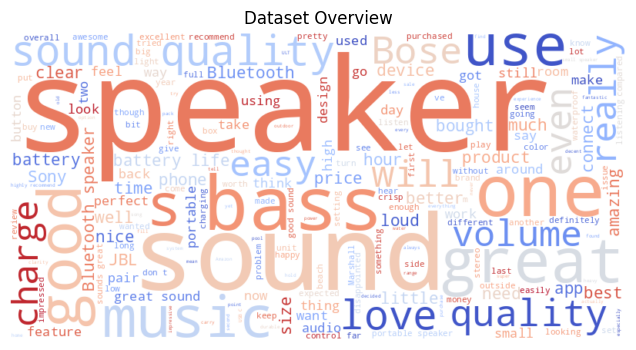

In [22]:
#wordcloud to show overview of data
from wordcloud import WordCloud

all_reviews = ' '.join(data_df['content'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='coolwarm',).generate(all_reviews)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Dataset Overview')
plt.show()

### Standardizing

The data has to be standardized for accurate analysis. This can also be done in the cleaning section.

In [23]:
data_df['date'] = pd.to_datetime(data_df['date'])
unique_colors = data_df['Color'].unique()
print(unique_colors)

['Off White' 'Orange' 'Forest Gray' 'Black' 'White Smoke' 'Stone Blue'
 'Green' 'Chilled Lilac' 'Statement Red' 'Matte Black' 'Champagne Gold'
 'White' 'Red' 'Blue' 'Camouflage' 'Light Gray' 'not listed'
 'Black & Brass' 'Cream' 'Luxe Silver' 'Teal' 'Pink' 'Gray'
 'Signature Black' 'Oat White' 'Black Anthracite' 'Grey Mist' 'Navy'
 'Chestnut' 'Silver']


In [24]:
#standardizing colors for EDA
color_mapping = {
    'Off White': 'White',
    'Orange': 'Orange',
    'Forest Gray': 'Gray',
    'Black': 'Black',
    'White Smoke': 'White',
    'Stone Blue': 'Blue',
    'Green': 'Green',
    'Chilled Lilac': 'Lilac',
    'Statement Red': 'Red',
    'Matte Black': 'Black',
    'Champagne Gold': 'Gold',
    'White': 'White',
    'Red': 'Red',
    'Blue': 'Blue',
    'Camouflage': 'Camouflage',
    'Light Gray': 'Gray',
    'not listed': 'not listed',
    'Black & Brass': 'Black & Brass',
    'Cream': 'Cream',
    'Luxe Silver': 'Silver',
    'Teal': 'Teal',
    'Pink': 'Pink',
    'Gray': 'Gray',
    'Signature Black': 'Black',
    'Oat White': 'White',
    'Black Anthracite': 'Black',
    'Grey Mist': 'Gray',
    'Navy': 'Blue',
    'Chestnut': 'Chestnut',
    'Silver': 'Silver',
}


data_df['Standardized_Color'] = data_df['Color'].map(color_mapping)

### EDA

The following analysis includes different statistical values relating to different columns of the dataset.

In [25]:
mode_color = data_df['Standardized_Color'].mode()[0]
print(f"Mode of Standardized Color: {mode_color}")

mean_rating = data_df['rating'].mean()
print(f"Mean Rating: {mean_rating}")

mode_rating = data_df['rating'].mode()[0]
print(f"Mode Rating: {mode_rating}")

ratings_under_4 = data_df[data_df['rating'] < 4].shape[0]
print(f"Number of ratings under 4: {ratings_under_4}")

variance_rating = data_df['rating'].var()
print(f"Variance in Rating: {variance_rating}")

Mode of Standardized Color: Black
Mean Rating: 4.494252873563219
Mode Rating: 5
Number of ratings under 4: 171
Variance in Rating: 1.062004741261251


This analysis looks at if color is a relevant attribute to discerning negative reviews, or if a specific color is more prevalent in negative reviews.


Black was the most prominent, but on the other hand it was also the mode.

In [26]:
#how color may affect "negative" rating ---- BASED ON MEAN
filtered_data = data_df[data_df['rating'] < 4]
mode_color_under_4 = filtered_data['Standardized_Color'].mode()[0]
print(f"Mode of Standardized Color for ratings under 4: {mode_color_under_4}")

negative_reviews = data_df[data_df['rating'] < 4]
unique_colors = negative_reviews['Standardized_Color'].unique()
print("Unique colors in negative reviews:")
print(unique_colors)

Mode of Standardized Color for ratings under 4: Black
Unique colors in negative reviews:
['Black' 'Gray' 'Silver' 'Black & Brass' 'Cream' 'Orange' 'Blue' 'White'
 'Green' 'Gold' 'Chestnut']


This analysis is to find which of the products had the most negative reviews.



The product ID with the most negative reviews corresponds to the "**Sony SRS-XE200 X-Series Wireless Ultra Portable-Bluetooth-Speaker**"

In [27]:
#products with most "negative" reviews ---- BASED ON MEAN
negative_reviews = data_df[data_df['rating'] < 4]
negative_review_counts = negative_reviews.groupby('product_id').size().reset_index(name='negative_review_count')
negative_review_counts_sorted = negative_review_counts.sort_values(by='negative_review_count', ascending=False)

print(negative_review_counts_sorted)

    product_id  negative_review_count
8   B0B44F1GGK                     39
1   B07YBN9XXG                     30
5   B097XX34SL                     21
7   B09XXW54QG                     20
0   B01IOD7KB6                     16
2   B08VL5S148                      8
4   B08YRT9T38                      8
10  B0CXL4FQBK                      8
12  B0D4SX9RC6                      8
9   B0CVFM97GD                      5
11  B0CY6S748H                      5
3   B08X4YMTPM                      2
6   B099TJGJ91                      1


### 5.2 Visualizations
Include relevant visualizations (histograms, box plots, scatter plots, etc.) and explain what each visualization reveals about the data.

    product_id  average_rating
6   B093SLWMS7        5.000000
4   B08X4YMTPM        4.885965
8   B099TJGJ91        4.845455
11  B0BG93TZ5N        4.842105
1   B07DD3WBYW        4.800000
3   B08VL5S148        4.690000
13  B0CXL4FQBK        4.673267
9   B09XXW54QG        4.538462
15  B0D4SX9RC6        4.530303
0   B01IOD7KB6        4.464646
14  B0CY6S748H        4.366667
7   B097XX34SL        4.350000
5   B08YRT9T38        4.151515
10  B0B44F1GGK        4.144737
2   B07YBN9XXG        4.072072
12  B0CVFM97GD        4.000000


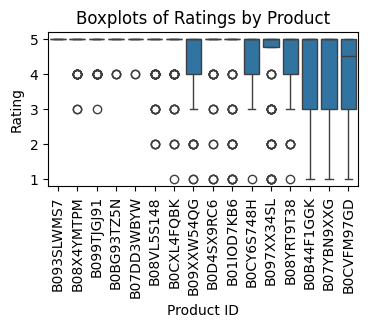

In [28]:
#average rating per product
average_rating_per_product = data_df.groupby('product_id')['rating'].mean().reset_index()
average_rating_per_product.columns = ['product_id', 'average_rating']
average_rating_per_product_sorted = average_rating_per_product.sort_values(by='average_rating', ascending=False)

print(average_rating_per_product_sorted)

plt.figure(figsize=(4, 2))
sns.boxplot(x='product_id', y='rating', data=data_df, order=average_rating_per_product_sorted['product_id'])
plt.xticks(rotation=90)
plt.title('Boxplots of Ratings by Product')
plt.xlabel('Product ID')
plt.ylabel('Rating')
plt.show()

<ipython-input-29-6596ff50cb89>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')


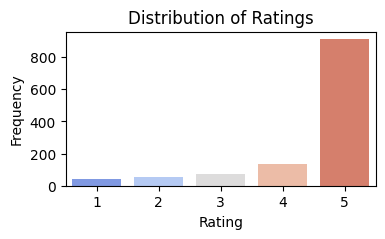

In [29]:
#distribution of ratings
rating_counts = data_df['rating'].value_counts().sort_index()

plt.figure(figsize=(4, 2))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


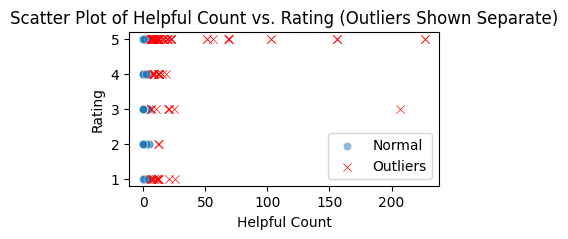

In [30]:
#helpful count vs rating, outliers shown

# IQR
Q1_helpful = data_df['helpful_count'].quantile(0.25)
Q3_helpful = data_df['helpful_count'].quantile(0.75)
IQR_helpful = Q3_helpful - Q1_helpful

lower_bound_helpful = Q1_helpful - 1.5 * IQR_helpful
upper_bound_helpful = Q3_helpful + 1.5 * IQR_helpful

clean_data = data_df[(data_df['helpful_count'] >= lower_bound_helpful) & (data_df['helpful_count'] <= upper_bound_helpful)]

plt.figure(figsize=(4, 2))
sns.scatterplot(x='helpful_count', y='rating', data=clean_data, alpha=0.5, label='Normal')
sns.scatterplot(x='helpful_count', y='rating', data=data_df[~data_df.index.isin(clean_data.index)], color='red', marker='x', label='Outliers')
plt.title('Scatter Plot of Helpful Count vs. Rating (Outliers Shown Separate)')
plt.xlabel('Helpful Count')
plt.ylabel('Rating')
plt.legend()
plt.show()

<ipython-input-31-9450449a71bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024['year_month'] = data_2024['date'].dt.to_period('M')


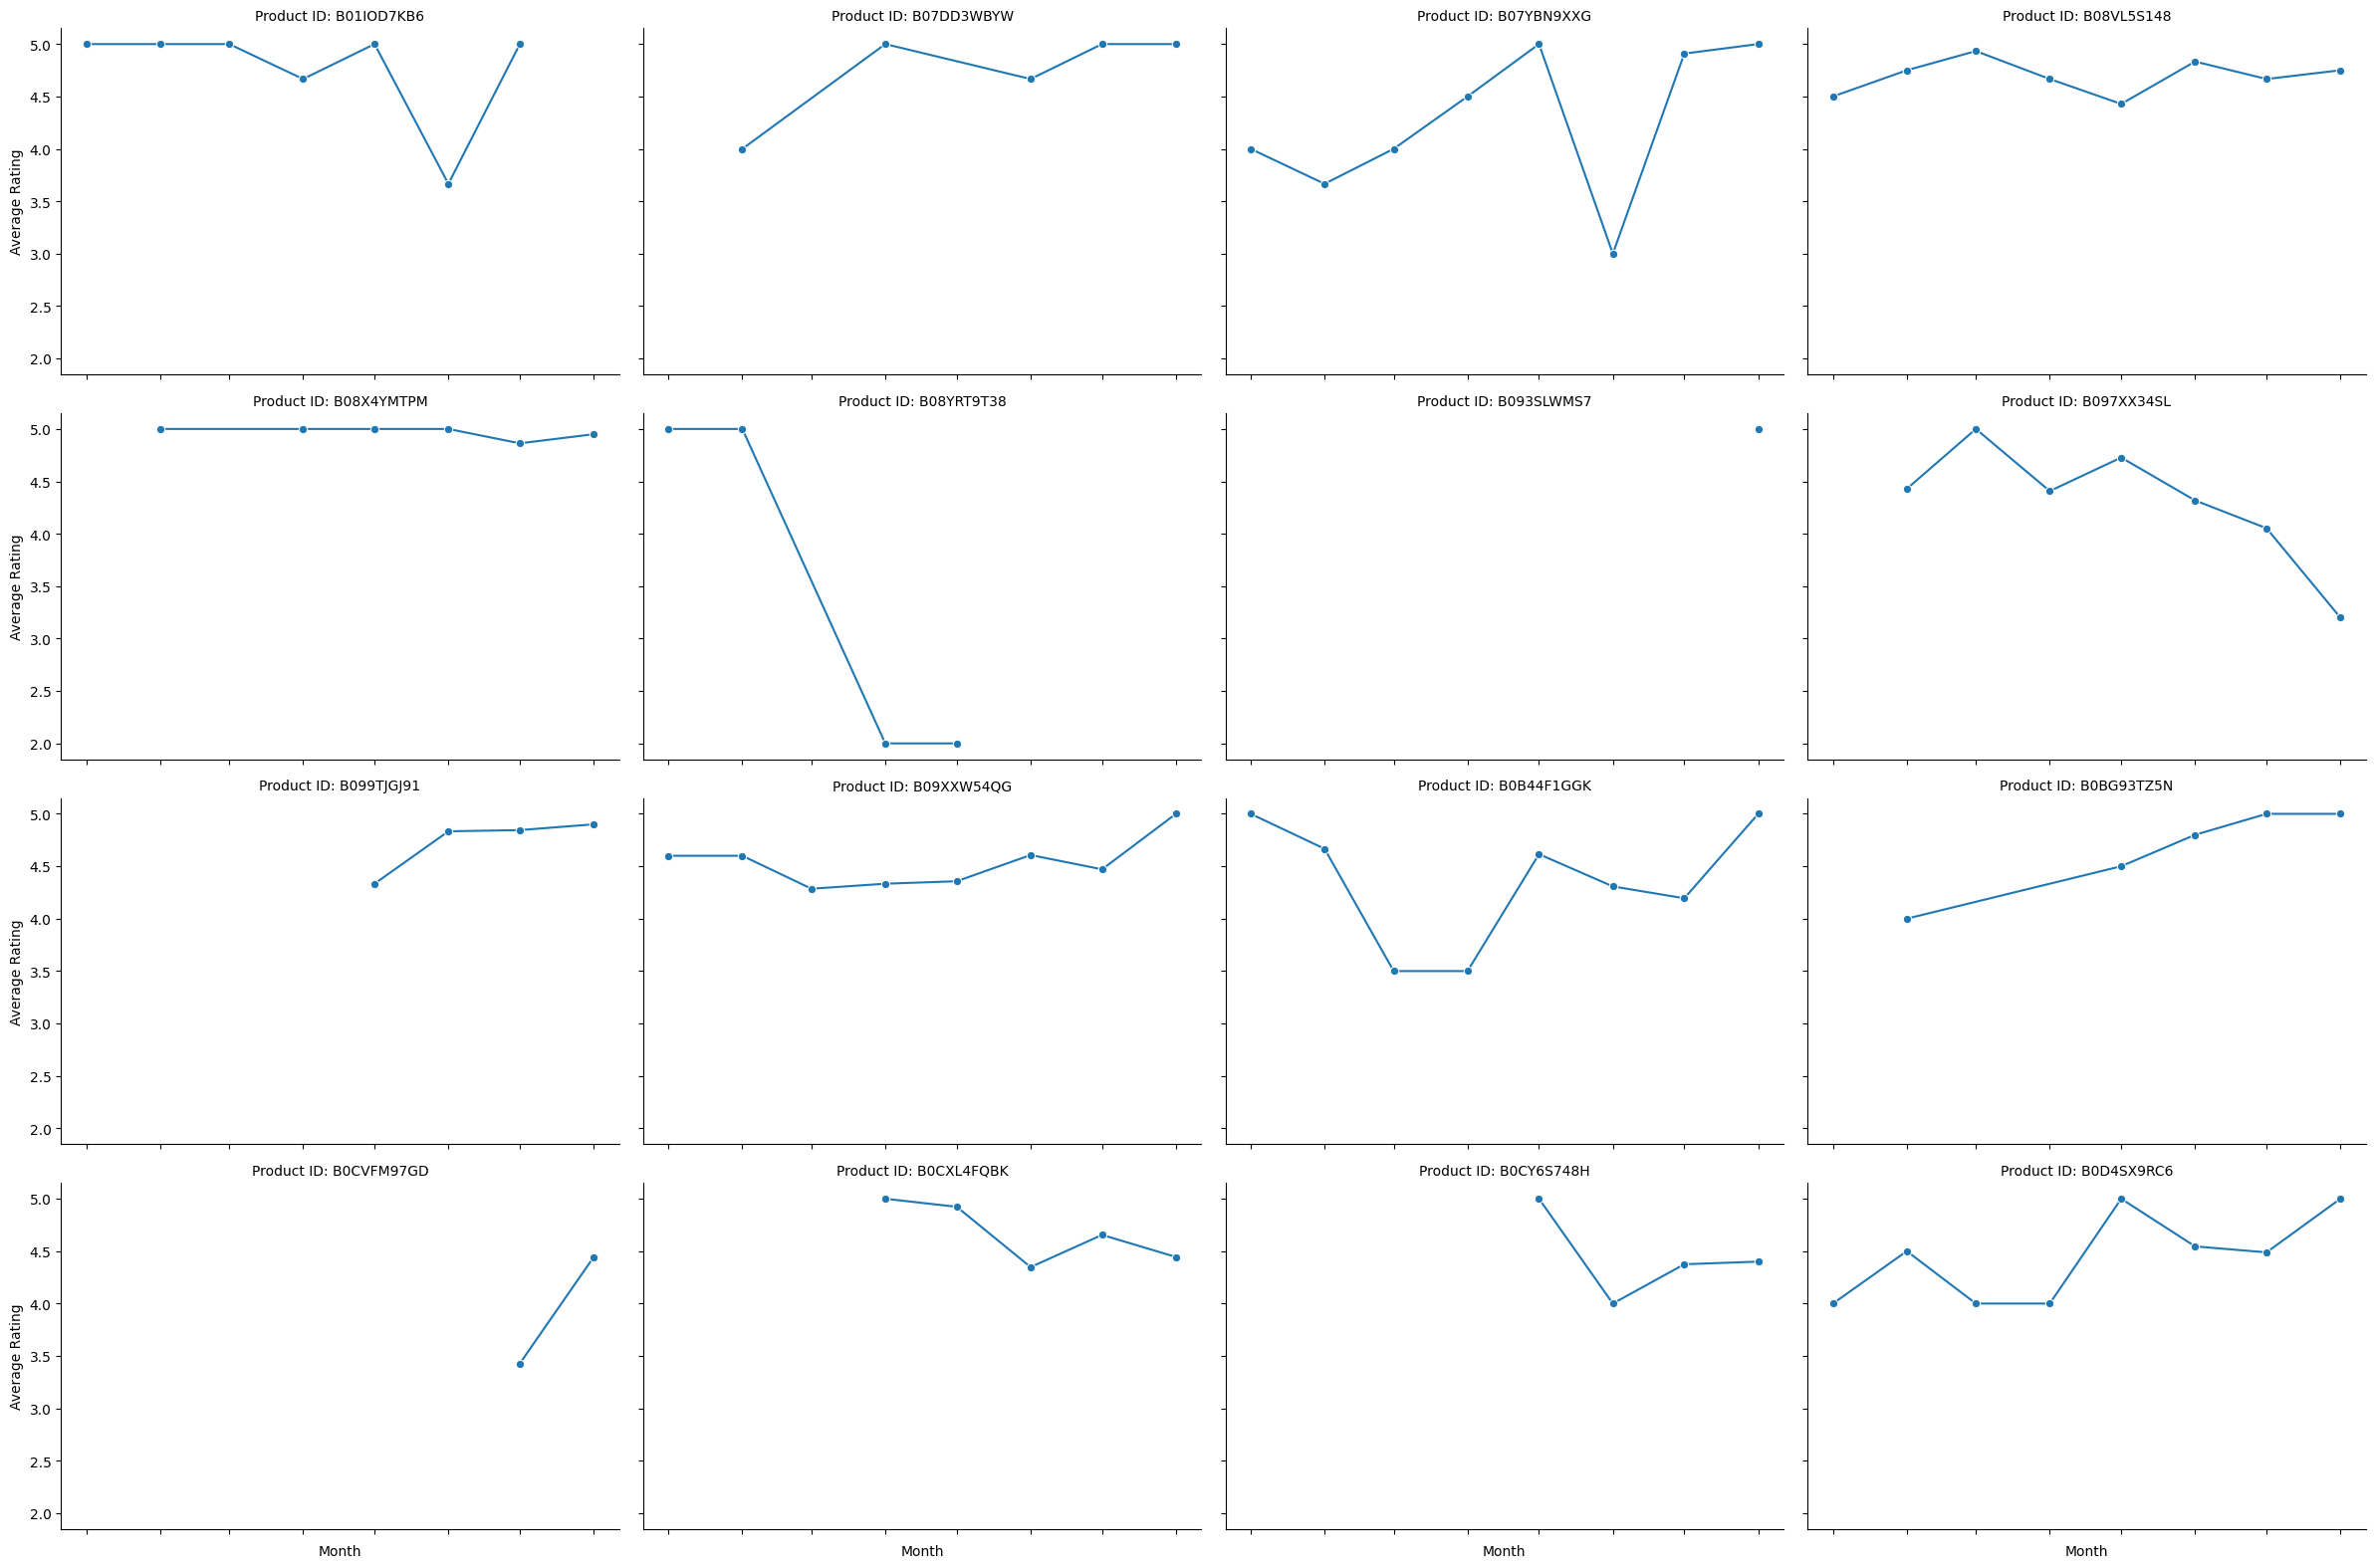

In [31]:
#reviews throughout the year 2024

data_2024 = data_df[data_df['date'].dt.year == 2024]

data_2024['year_month'] = data_2024['date'].dt.to_period('M')

monthly_ratings_2024 = data_2024.groupby(['product_id', 'year_month']).agg({'rating': 'mean'}).reset_index()
monthly_ratings_2024['year_month'] = monthly_ratings_2024['year_month'].dt.to_timestamp()

monthly_ratings_2024['month_num'] = monthly_ratings_2024['year_month'].dt.to_period('M').astype(int)

g = sns.FacetGrid(monthly_ratings_2024, col='product_id', col_wrap=4, height=4, aspect=1.5)
g.map(sns.lineplot, 'year_month', 'rating', marker='o')
g.set_titles(col_template='Product ID: {col_name}')
g.set_axis_labels('Month', 'Average Rating')
g.set_xticklabels(rotation=45)
plt.show()

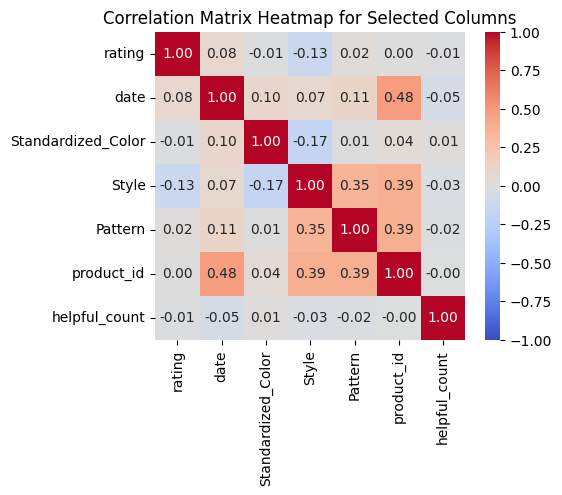

In [32]:
#heatmap
columns_of_interest = ['rating', 'date', 'Standardized_Color', 'Style', 'Pattern', 'product_id', 'helpful_count']
filtered_df = data_df[columns_of_interest].copy()

filtered_df['date'] = pd.to_datetime(filtered_df['date']).astype(int) / 10**9

for column in ['Standardized_Color', 'Style', 'Pattern', 'product_id']:
    filtered_df[column].replace('not listed', pd.NA, inplace=True)
    filtered_df[column] = filtered_df[column].astype('category').cat.codes

correlation_matrix = filtered_df.corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap for Selected Columns')
plt.show()

In [33]:
print("Correlation Summary:")
for i, row in enumerate(correlation_matrix.index):
    for j, col in enumerate(correlation_matrix.columns):
        if j > i:
            value = correlation_matrix.at[row, col]
            sign = 'positive' if value > 0 else 'negative' if value < 0 else 'zero'
            print(f'Correlation between {row} and {col}: {sign}')

Correlation Summary:
Correlation between rating and date: positive
Correlation between rating and Standardized_Color: negative
Correlation between rating and Style: negative
Correlation between rating and Pattern: positive
Correlation between rating and product_id: positive
Correlation between rating and helpful_count: negative
Correlation between date and Standardized_Color: positive
Correlation between date and Style: positive
Correlation between date and Pattern: positive
Correlation between date and product_id: positive
Correlation between date and helpful_count: negative
Correlation between Standardized_Color and Style: negative
Correlation between Standardized_Color and Pattern: positive
Correlation between Standardized_Color and product_id: positive
Correlation between Standardized_Color and helpful_count: positive
Correlation between Style and Pattern: positive
Correlation between Style and product_id: positive
Correlation between Style and helpful_count: negative
Correlation b

### 5.3 Descriptive Statistics


**1.Product Ratings and Trends**

Mean Rating: The average rating across all products is approximately 4.49, indicating generally positive reviews.

Mode Rating: The most common rating is 5, which suggests a high level of customer satisfaction for many products.

Variance and Ratings Distribution: The variance in ratings is relatively low (1.06), showing that while there are some differences in ratings, the majority are concentrated around the mean. The distribution of ratings shows a peak at the higher ratings (4 and 5).

Implications: Most customers are highly satisfied with Beats by Dre products. However, there are still some reviews below the 4-star mark that could indicate areas for improvement. Regular monitoring and addressing the feedback from lower ratings could further enhance customer satisfaction.

**2.Color and Rating Correlation**

Mode of Color in Negative Reviews: The most common color for products with ratings under 4 is "Black."

Color Variability: Colors like Black, Gray, Silver, and Black & Brass are common in negative reviews, but there is a diverse range of colors associated with lower ratings.

Implications: The color of the product seems to influence customer satisfaction, but the correlation is not strong. If specific colors are consistently associated with negative reviews, it might be worth exploring whether color affects the perceived quality or satisfaction of the product.

**3.Products with Most Negative Reviews**

Top Products: Products like B0B44F1GGK and B07YBN9XXG have a higher number of negative reviews compared to others.

Implications: These products may have issues that need addressing. Investigating the specifics of the complaints for these products can provide insights into potential design or quality issues that need improvement.

**4.Trends Over Time**

Monthly Ratings: Ratings fluctuated throughout 2024 so far, but most porducts had an increase in positive ratings towards the end of the time line (July).

Implications: Monitoring monthly trends can help identify if there are any specific times when customer satisfaction improves or declines. This can inform marketing strategies, promotional offers, or product adjustments.

**5.Sentiment Analysis**

Average Sentiment Score: The average sentiment score is 0.30, indicating a generally positive sentiment.

Implications: The high number of positive reviews and the average sentiment score suggest that overall customer sentiment is positive. However, the small proportion of negative reviews should not be overlooked. Addressing common themes in negative reviews can help in improving the product and customer experience.


## 6. Sentiment Analysis


### 6.1 Methodology


TextBlob is a Python library used for processing textual data and performing sentiment analysis. It simplifies the process of extracting sentiment from text by providing a straightforward API.






Sentiment scores range from -1 to 1 where:
* -1 represents very negative sentiment.
* 0 represents neutral sentiment.
* 1 represents very positive sentiment.

The following code shows how the sentiment was calculated specifically for the Beats Pill, product ID: B0D4SX9RC6

In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

product_reviews = data_df[data_df['product_id'] == 'B0D4SX9RC6']

product_reviews['sentiment'] = product_reviews['content'].apply(analyze_sentiment)

The Natural Language Toolkit (NLTK) is a Python library used for working with human language data and performing various text processing tasks. In this next code snippet, NLTK was used to download the 'punkt' tokenizer, which is necessary for text processing in the TextBlob library. TextBlob was then utilized to extract noun phrases from the content of positive reviews to identify key themes and terms associated with higher ratings.

In [ ]:
import nltk
from textblob import TextBlob

nltk.download('punkt')

def extract_noun_phrases(text):
    blob = TextBlob(text)
    return blob.noun_phrases

positive_reviews = data_df[data_df['rating'] >= 4]
positive_reviews['noun_phrases'] = positive_reviews['content'].apply(extract_noun_phrases)

### 6.2 Results


The following analysis shows the average sentiment score for all products and for the Beats Pill Specifically

In [38]:
#average sentiment score for all products
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

data_df['sentiment'] = data_df['content'].apply(analyze_sentiment)
average_sentiment = data_df['sentiment'].mean()
print(f'Average Sentiment Score: {average_sentiment}')


Average Sentiment Score: 0.30167187223743014


This shows an average of a positive sentiment towards all the products, including competitors.

In [39]:
#average sentiment for the Beats Pill
product_reviews = data_df[data_df['product_id'] == 'B0D4SX9RC6']
product_reviews['sentiment'] = product_reviews['content'].apply(analyze_sentiment)
average_sentiment = product_reviews['sentiment'].mean()
print(f'Average Sentiment for Product ID B0D4SX9RC6: {average_sentiment}')


Average Sentiment for Product ID B0D4SX9RC6: 0.3225757237924382


<ipython-input-39-373ef954c0c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_reviews['sentiment'] = product_reviews['content'].apply(analyze_sentiment)


An average sentiment of 0.3226 shows a generally positive sentiment towards the Beats Pill.

In [41]:
#count of positive, negative, and neutral reviews

counts = {'positive': 0, 'negative': 0, 'neutral': 0}

# Count occurrences of each sentiment
for sentiment in product_reviews['sentiment']:
    if sentiment >0:
        counts['positive'] += 1
    elif sentiment <0:
        counts['negative'] += 1
    else:
        counts['neutral'] += 1

# Print counts
print(counts)

{'positive': 63, 'negative': 1, 'neutral': 2}


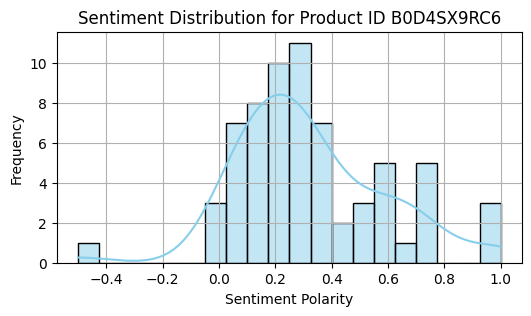

In [40]:
#histogram of sentiment scores for Beats Pill
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 3))
sns.histplot(product_reviews['sentiment'], bins=20, kde=True, color='skyblue')
plt.title('Sentiment Distribution for Product ID B0D4SX9RC6')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


This distribution of sentiments shows that the reviews were concentrated in the positive direction, with one value being a negative sentiment -- possibly an outlier.

The following code conducts an analysis on all the product reviews to see which phrases are most prevalent in positive and negative reviews:

In [43]:
#key phrases
import nltk
from textblob import TextBlob
nltk.download('brown')
nltk.download('punkt')

def extract_noun_phrases(text):
    blob = TextBlob(text)
    return blob.noun_phrases

positive_reviews = data_df[data_df['rating'] >= 4]
positive_reviews['noun_phrases'] = positive_reviews['content'].apply(extract_noun_phrases)

print(positive_reviews[['noun_phrases']].head())

negative_reviews = data_df[data_df['rating'] < 4]
negative_reviews['noun_phrases'] = negative_reviews['content'].apply(extract_noun_phrases)

print(negative_reviews[['noun_phrases']].head())

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-43-ca4fba9009dc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['noun_phrases'] = positive_reviews['content'].apply(extract_noun_phrases)


                                        noun_phrases
0  [new versatile portable speaker, summer advent...
1  [color, vibrant.charge- stays, deep, daysound ...
2  [excellent speaker, post reviews, soundit, sou...
3  [bose, ult, base, voice, ult, updated, does, e...
4  [sony wireless, teenage son, sony, attention i...
                                         noun_phrases
7   [wireless speaker, quiet voice, ca n't, music ...
45    [sound quality, great overall, easy, bluetooth]
47  ['s waterproof aspect, sound quality, price ra...
87                                   [doesn ’ t, ’ m]
93                                   [eq, especially]


<ipython-input-43-ca4fba9009dc>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['noun_phrases'] = negative_reviews['content'].apply(extract_noun_phrases)


In the positive reviews, noun phrases such as "new versatile portable speaker" and "excellent speaker" highlight the favorable attributes praised by customers.

In contrast, the noun phrases extracted from negative reviews show a different pattern. Phrases such as "quiet voice," "doesn't," and "price range" indicate areas of dissatisfaction or issues faced by reviewers.

## 7. AI-Generated Insights



### 7.1 Using Gemini AI


Gemini AI was used to extract insights from customer reviews by leveraging its generative capabilities to analyze and summarize feedback. The process involved configuring the Gemini AI model with an API key and using the "gemini-1.5-flash" model for text generation. In this setup, a chat session was initiated where a prompt was created to query the AI with specific prompts. The AI then processed the reviews and generated a summary of recurring issues and concerns, providing actionable insights based on the analysis of customer feedback.

In [ ]:
import google.generativeai as genai

def chatbot(reviews, api_key):
  genai.configure(api_key=api_key)
  model = genai.GenerativeModel(
    model_name="gemini-1.5-flash",
    generation_config = {
      "temperature": 1,
      "top_p": 0.95,
      "top_k": 64,
      "max_output_tokens": 8192,
      "response_mime_type": "text/plain",
    }
  )
  chat_session = model.start_chat(history =[])

  prompt = " What specific pain points or unmet needs do customers consistently mention? \n\n" + "\n\n".join(reviews)

  response = chat_session.send_message(prompt)

  return response.text


### 7.2 Key Insights



**PROMPTS AND INSIGHTS PROCURED**


1.**Based on these reviews, what types of customers seem to be the most satisfied with these products?**

Target Consumers are:
* Outdoor Enthusiasts

* Audiophiles

* Those Seeking Portability and Convenience

* Budget-Conscious Customers

2.**What aspects of product B0D4SX9RC6 (The Beats Pill) leads the customer to leave a positive or negative review?**

**Positive Reviews:**
* **Sound Quality:**  Reviewers often praise the Pill's sound quality, highlighting the punchy bass, clear vocals, and overall balanced sound.
* **Portability:** Its compact size and lightweight design make it easy to take on the go, fitting in bags or pockets.
* **Durability:**  The Pill's water-resistant (IP67) and dustproof design is appreciated for use in various environments.
* **Battery Life:**  The long battery life (claimed 24 hours) is a key selling point, allowing for extended listening sessions.
* **Design:**  The sleek, modern design and vibrant colors are popular with customers.
* **Apple Integration:**  For Apple users, the Pill's seamless integration with iPhones and the "Find My" feature are significant advantages.
* **Speakerphone Feature:**  The inclusion of a microphone for hands-free calling is a valuable feature.
* **USB-C Charging:**  The adoption of USB-C for charging is seen as a positive update, making it convenient to charge.
* **Value for Money:** Customers often find the Pill's price to be reasonable for its performance and features.

**Negative Beats Pill Reviews:**

* **Lack of App:** Some reviewers miss having a dedicated app for the speaker to control settings, EQ, or check battery life.
* **Sound Quality at High Volume:**  The bass can become distorted at high volumes, indicating that the sound isn't as balanced at maximum output.
* **No Passive Radiator:**  The absence of a passive radiator might limit the bass response, especially for bass-heavy genres.
* **One Touch Connect:** The "one touch connect" feature is inconsistent and not reliable for all users.
* **Packaging:**  Some reviewers have noted that the packaging arrived damaged, which is concerning regarding the product's protection during shipping.

3.**What specific pain points or unmet needs do customers consistently mention?
Based on the reviews you've provided, here are some consistent customer pain points and unmet needs:**

**Sound Quality:**

* **Lack of Bass:** Many reviewers express disappointment with the lack of deep, punchy bass, particularly in speakers marketed as having "extra bass" or "booming sound."
* **Muffled Sound:** Several reviewers mention a muffled or unclear sound, especially at lower volumes or when using certain genres of music (e.g., classical music).
* **Distortion at Higher Volumes:** Some speakers exhibit distortion or a less-refined sound when the volume is cranked up, particularly those that emphasize bass.
* **Inconsistent Sound Quality:** Some speakers are criticized for sounding good on certain songs or genres but lacking in other cases, suggesting inconsistent audio performance.

**Features and Functionality:**

* **Outdated Bluetooth Technology:** Some speakers are criticized for using older Bluetooth versions, which can lead to connectivity issues or limitations.
* **Lack of EQ Controls:**  A lack of built-in equalizer controls, or limited options within the app, makes it difficult for users to customize the sound profile to their preference.
* **Fiddly or Unintuitive Controls:** Some speakers are found to have difficult-to-use controls, such as complex button combinations or poorly designed interfaces.
* **Unexplained Voice Prompts:** Some speakers have annoying voice prompts that cannot be disabled, providing unnecessary information or interrupting the listening experience.

**Other:**

* **Price:**  While many appreciate the sound quality of higher-priced speakers, some express concern that the cost is not justified, particularly when compared to less expensive alternatives.
* **Battery Life:**  Battery life is a recurring topic, with some speakers failing to meet their advertised duration or experiencing quick depletion when using higher volumes.
* **Durability:**  Despite waterproof and shockproof claims, some speakers experience damage or malfunctions after a short period, raising concerns about their durability.
* **Charging Issues:**  Several users report problems with charging, such as charging ports failing or speakers refusing to charge beyond a certain percentage.

**Unmet Needs:**

* **Wider Soundstage:** Many users desire more stereo separation or a wider soundstage, especially in smaller speakers that often deliver a more mono sound.
* **App Functionality:**  Many users wish for more advanced app features, such as detailed EQ controls, better organization of music libraries, or seamless integration with multiple devices.
* **Simpler Pairing and Setup:**  Some reviewers express frustration with complex setup procedures or difficulties connecting to certain devices.
* **Improved Battery Life:** There is a consistent desire for longer battery life, particularly at higher volume levels.
* **More Affordable Prices:** Many seek speakers that deliver high-quality sound at a more affordable price point.


### 7.3 Interpretation


**What is Working**

* Sound Quality: The Beats Pill is praised for its clear vocals, punchy bass, and overall balanced sound.
* Portability: Its compact and lightweight design is appreciated for ease of transport and use on the go.
* Battery Life: The claimed 24-hour battery life is a strong selling point,
allowing for extended listening sessions.

* Design and Integration: The sleek design and Apple integration (including the "Find My" feature) are popular among users, adding convenience and style.

**Beats' Target Market**

* Outdoor Enthusiasts: The Beats Pill's portability and durability make it ideal for users who are active and frequently outdoors.
* Audiophiles: While some appreciate its sound quality, others might be disappointed with the distortion at higher volumes and lack of a passive radiator.
* Portability Seekers: Those who value compact size and long battery life find the Beats Pill convenient and practical.

* Budget-Conscious Customers: The value for money is seen positively, offering good performance relative to its price, though some seek better sound quality for their investment.

**Overall Unmet Needs in the Market**

* Sound Quality Issues: Customers consistently mention issues such as lack of bass, muffled sound, and distortion at higher volumes. These complaints highlight a need for improvement in audio performance, especially for bass-heavy genres and at higher volume levels.

* Features and Functionality: The lack of a dedicated app for controlling settings and EQ, along with outdated Bluetooth technology and fiddly controls, are recurring themes in negative reviews. Users are looking for more advanced app features, better customization options, and a more intuitive interface.

* Durability and Charging Issues: Concerns about durability and charging problems suggest that while the product is designed for rugged use, some users have experienced issues with long-term reliability and charging efficiency.

* More Needs: Customers have expressed a desire for a wider soundstage, more customizable sound settings, simpler pairing and setup processes, and longer battery life. These unmet needs indicate areas where improvements could enhance the overall user experience.

## 8. Comparative Analysis



###List of competitors analyzed:



BB08X4YMTPM: JBL Charge 5 Portable Waterproof Wireless Bluetooth Speaker


B099TJGJ91: Bose SoundLink Flex Bluetooth Speaker


B0BG93TZ5N: Tronsmart Bang SE Portable Bluetooth

B07DD3WBYW: Ultimate Ears Boom 3 Portable Waterproof Speaker

B08VL5S148: Bose SoundLink Revolve+ (Series II) Bluetooth Speaker

B0CXL4FQBK: Sony ULT Field 1 Wireless Ultra Portable Bluetooth Speaker

B09XXW54QG: Marshall Emberton II Portable Bluetooth Speaker

B01IOD7KB6: House of Marley - Get Together Bluetooth Portable Speaker

B0CY6S748H: Roam 2 - Black - Portable Waterproof Bluetooth Speaker

B097XX34SL: Monster S320 Bluetooth Speaker

B08YRT9T38: Bang & Olufsen Beosound Explore - Wireless Portable Speaker

B0B44F1GGK:Sony SRS-XE200 X-Series Wireless Ultra Portable Speaker

B07YBN9XXG: Bose Soundlink Mini II Special Edition Bluetooth Speaker

B0CVFM97GD: Ultimate Ears MEGABOOM 4 Portable Speaker


### 8.1 Competitor Overview


Using Gemini, these were the general consensus towards other products.

**Specific Speaker Highlights:**

**Sony ULT Field 1:**

* **Pros:** Excellent sound quality, great bass, portable, durable, IP67 water-resistant, good battery life, easy to pair with Bluetooth, ULT button enhances bass.
* **Cons:**  Can sound muffled at high volumes, lacking in bass compared to some other models, battery life could be better.

**JBL Charge 5:**

* **Pros:** Excellent sound quality, great bass, waterproof, long battery life, built-in power bank, PartyBoost feature for linking multiple speakers, durable.
* **Cons:**  Can be heavy, price can be higher compared to other brands, button timing for skipping tracks can be tricky.

**Bose SoundLink Mini II Special Edition:**

* **Pros:**  Excellent sound quality, well-balanced sound, compact and stylish design, long battery life, easy setup and connectivity, good for small to medium-sized rooms.
* **Cons:**  Can be expensive, no EQ controls, some users find voice prompts annoying, battery life not as good as advertised by some customers.

**Marshall Emberton II:**

* **Pros:**  Great sound quality, impressive bass for a small speaker, compact and portable, stylish design, good battery life, decent app with equalization features.
* **Cons:**  Single-button control can be challenging, app can be unreliable, some users find the sound too bass-heavy.

**Ultimate Ears Megaboom 4:**

* **Pros:**  Loud and clear sound, booming bass, waterproof, durable, drop-proof, floats, long battery life, party mode for linking multiple speakers, 360-degree sound.
* **Cons:**  Bass can be distorted at high volumes, no microphone for calls, no charging port for other devices.

**House of Marley Get Together Mini:**

* **Pros:**  Excellent sound quality, warm tone, well-built with natural materials, good battery life, attractive design.
* **Cons:**  Bulky size, battery life not as long as advertised by some users, lack of EQ controls.


### 8.2 Comparison of Sentiments


Comparing sentiments per product.

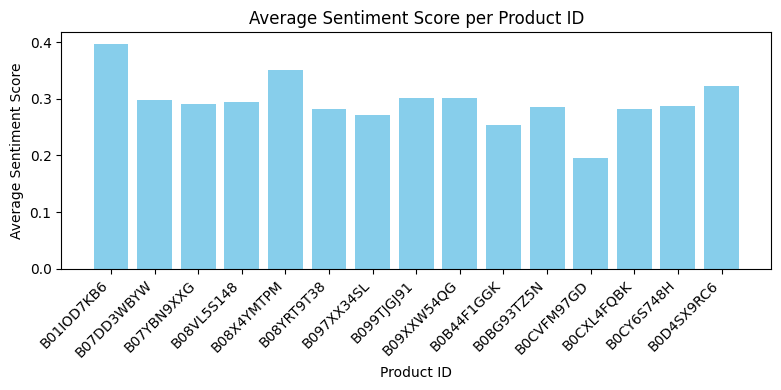

In [47]:
filtered_data = data_df[data_df['product_id'] != 'B093SLWMS7']

average_sentiments = filtered_data.groupby('product_id')['sentiment'].mean().reset_index()
average_sentiments.columns = ['Product ID', 'Average Sentiment']
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(average_sentiments['Product ID'], average_sentiments['Average Sentiment'], color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score per Product ID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

All of the average sentiments towards the products are about the same, all positive.




### 8.3 SWOT Analysis


**Strengths**:

Sound Quality: The Beats Pill is praised for its punchy bass and balanced mids and highs, offering clear vocals and overall good sound quality.

Portability: Its compact and lightweight design makes it highly portable, fitting easily in bags or pockets.

Durability: The IP67 rating ensures the speaker is water-resistant and dustproof, suitable for various environments.

Battery Life: With a claimed 24-hour battery life, the Beats Pill supports extended listening sessions.

Design and Integration: The sleek design and vibrant colors are popular, and seamless integration with Apple devices, including the "Find My" feature, enhance usability.

**Weaknesses**:

Sound Quality at High Volume: The bass can become muddy and less balanced at high volumes, affecting overall sound performance.

Lack of EQ Controls: The absence of built-in equalizer controls limits users' ability to customize sound profiles to their preferences.

Design Issues: Some users find the design too bulky, which may impact portability.

One Touch Connect: The "one touch connect" feature can be inconsistent and unreliable for some users.

Packaging Concerns: Reports of damaged packaging during shipping raise concerns about product protection and initial impressions.

**Opportunities**:

Enhanced Features: Adding a dedicated app for control settings, EQ adjustments, and battery monitoring could address user concerns and improve overall functionality.

Improved High-Volume Performance: Enhancing the bass response and sound clarity at high volumes could mitigate current sound quality issues.

Expansion of Integration: Exploring better integration with non-Apple devices could broaden the appeal to a wider audience.

Additional Design Options: Offering variations in design and size could cater to diverse user preferences and improve portability.

**Threats**:

Competitive Market: Established brands like Bose, JBL, and Sony offer strong competition with features like superior bass, longer battery life, and additional functionalities.

Price Sensitivity: Price-conscious consumers might opt for competitors offering similar or better features at a lower cost.

Negative Reviews: Persistent issues with sound quality at high volumes and lack of EQ controls could lead to negative reviews and affect brand reputation.

Technological Advances: Rapid advancements in Bluetooth speaker technology could make current features seem outdated, impacting the Beats Pill's market position.


## 9. Strategic Recommendations



### 9.1 Product Improvements

 **Provide More Transparency:**  Customers found the unboxing experience disappointing as the package arrived already open.  Ensure a consistent and premium unboxing experience.

**Address Bass Distortion:**  Customers report bass distortion at higher volumes.  Explore ways to optimize the speaker's performance at high volumes and provide clear guidelines on volume levels.

**Consider Adding an EQ:**  Many customers expressed the need for an EQ within the Beats Pill+ app.  Consider incorporating an equalizer to allow for greater sound customization.

### 9.2 Marketing Strategies


**Leverage Influencer Partnerships**: Collaborate with influencers and brand ambassadors who align with the target demographics to showcase real-life use cases and benefits.

**Offer Limited-Time Promotions**: Provide special offers or discounts during peak shopping periods to attract budget-conscious customers and increase sales.

**Enhance Customer Support**: Introduce an app or improved customer support to address issues like one-touch connect reliability and provide a better user experience.

**Streamline Product Packaging**: Ensure packaging is durable and premium to reduce damage during shipping and enhance the unboxing experience.


### 9.3 Future Research


To deepen the analysis of the Beats Pill, a few key areas for future research stand out.

First, tracking how the speaker performs over time would shed light on its long-term durability and battery life, revealing any issues that might develop with extended use.

 Second, examining how the speaker performs in different environments and usage scenarios could help understand its reliability in real-world conditions, such as frequent travel or outdoor activities.

 Third, looking into how well the Beats Pill integrates with various devices and platforms could enhance its compatibility and overall user experience.

 Finally, investigating new audio technologies and features might uncover ways to improve sound quality and functionality, ensuring the speaker continues to meet customer needs and stay ahead in the market.




## 10. Conclusion


The analysis of Beats Pill reviews highlights several key takeaways. Customers really appreciate the speaker's sound quality, portability, and stylish design. They often praise its punchy bass, balanced audio, and durable build. The long battery life and smooth integration with Apple devices are also big wins. However, some users have voiced concerns about sound distortion at high volumes, the absence of an app for customizing sound settings, and occasional issues with packaging and the “one touch connect” feature.

These findings suggest that while the Beats Pill does well in many areas, there’s room for improvement. Addressing issues like high-volume distortion and adding more user-friendly controls could make a big difference in overall satisfaction.

Overall, this project has provided valuable insights into consumer sentiment for Beats by Dre. It sheds light on what users love about the product and where improvements could be made. This feedback is crucial for guiding future updates and ensuring the Beats Pill remains a top choice for customers.

## 11. References


[Gemini AI](https://www.gemini.ai/)

[Amazon ](https://www.amazon.com/)

[Oxylabs](https://oxylabs.io/)

[Google Colab](https://colab.research.google.com/)

[Beats by Dre](https://www.beatsbydre.com/)